In [1]:
using AlgebraicStockFlow

using LabelledArrays
using OrdinaryDiffEq
using Plots
using JSON

using Catlab
using Catlab.CategoricalAlgebra
using Catlab.Graphics
using Catlab.Programs
using Catlab.Theories
using Catlab.WiringDiagrams

using LabelledArrays
using LinearAlgebra: mul!

In [2]:
sir_BoneStockFlow = BoneStockFlow(6, (1,(2,4)), (2,(3,5)),(3,6))

I,ifn,is
1,1,1
2,2,2
3,3,3
O,ofn,os
1,2,1
2,4,1
3,3,2
4,5,2
5,6,3


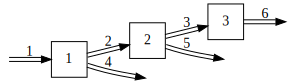

In [3]:
Graph(sir_BoneStockFlow)

In [4]:
sir_LabelledBoneStockFlow = LabelledBoneStockFlow([:birth, :inf, :rec, :deathS, :deathI, :deathR], :S=>(:birth,(:inf,:deathS)), :I=>(:inf,(:rec,:deathI)),:R=>(:rec,:deathR))

F,fname
1,birth
2,inf
3,rec
4,deathS
5,deathI
6,deathR
S,sname
1,S
2,I
3,R


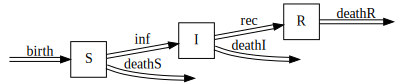

In [5]:
Graph(sir_LabelledBoneStockFlow)

In [6]:
f_birth(u,t)=0.001*(u.S+u.I+u.R)
# here use "*rand((1,2,3,4,5))" to test the solution of the stochastic models. And the results shows the flows would be 
# evaluated multi times instead of once if we use the OrdinaryDiffEq pkg. So, I think we need to implement the solution
# method by ourself, where make sure each flow should only be evaluated once!!
f_inf(u,t)= 0.1*u.S*u.I/(u.S+u.I+u.R)#*rand((1,2,3,4,5))
f_rec(u,t)=0.05*u.I
f_deathS(u,t)=u.S*0.001
f_deathI(u,t)=u.I*0.001
f_deathR(u,t)=u.R*0.001

f_deathR (generic function with 1 method)

In [7]:
sir_StockFlow = StockFlow{Function, Int}([f_birth, f_inf, f_rec, f_deathS, f_deathI, f_deathR], (990,(1 => (2,4))), (10,(2 => (3,5))),(0, (3 => 6)))

F,funcFlow
1,f_birth
2,f_inf
3,f_rec
4,f_deathS
5,f_deathI
6,f_deathR
S,initialValue
1,990
2,10
3,0


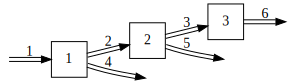

In [8]:
Graph(sir_StockFlow)

In [9]:
sir_LabelledStockFlow=LabelledStockFlow{Function, Int}((:birth=>f_birth, :inf=>f_inf, :rec=>f_rec, :deathS=>f_deathS, :deathI=>f_deathI, :deathR=>f_deathR), (:S, 990)=>(:birth => (:inf,:deathS)), (:I, 10)=>(:inf => (:rec,:deathI)),(:R, 0)=>(:rec=>:deathR))


F,funcFlow,fname
1,f_birth,birth
2,f_inf,inf
3,f_rec,rec
4,f_deathS,deathS
5,f_deathI,deathI
6,f_deathR,deathR
S,initialValue,sname
1,990,S
2,10,I
3,0,R


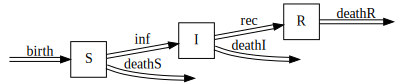

In [10]:
Graph(sir_LabelledStockFlow)

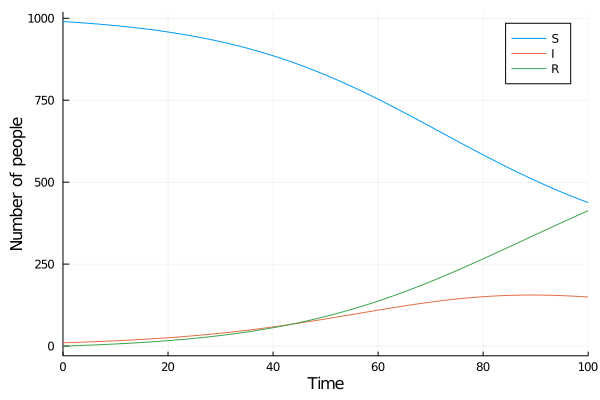

In [11]:
tspan = (0.0,100.0);
prob = ODEProblem(vectorfield(sir_LabelledStockFlow),initialValues(sir_LabelledStockFlow),tspan,funcFlows(sir_LabelledStockFlow));
sol = solve(prob,Tsit5());
plot(sol, xlabel="Time", ylabel="Number of people")